#Jonathan Halverson
#Thursday, February 18, 2016
#More Statistics (Revisiting Chapter 6 of Grus)

###A random variable is a variable whose possible values have an associated probability distribution. The outcome of a roll of the die is a random variable. The expectation value E of a random variable is the outcome weighted by their respective probabilities $E = \sum_i x_ip_i$: 

In [2]:
outcomes = [1, 2, 3, 4, 5, 6]
weights = [1/6.0 for _ in range(6)]
E_die = sum(outcome * weight for outcome, weight in zip(outcomes, weights))
print E_die

3.5


###The variance is $\sigma^2 = \sum (x_i - \mu)^2p_i$

In [3]:
var = sum(weight * (outcome - E_die)**2 for outcome, weight in zip(outcomes, weights))
print var, var**0.5

2.91666666667 1.70782512766


###If Z is a standard normal random variable, we can transform it to a normal distribution with mean mu and standard deviation sigma by $X=\sigma Z + \mu$. To transform it back use $Z=(X-\mu)/\sigma$. Note the resemblance to the z-score. 

#Central Limit Theorem 

###If we draw n samples from any distribution and a form a new random variable z, this new random variable is normally distributed. As n increases, the distribution becomes more sharply peaked. Let's try some numerical experiments: 

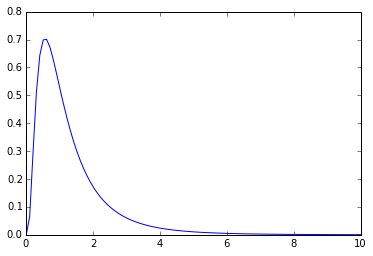

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import lognorm
x = np.linspace(0.01, 10, num=100)
samples = lognorm.rvs(s=0.75, size=1000)
plt.plot(x, lognorm.pdf(x, s=0.75))

In [5]:
lognorm.mean(s=0.75), lognorm.std(s=0.75)

(1.3247847587288655, 1.1511568928507236)

###Let's take samples from the above distribution in sizes of n and form a new histogram for each: 

1.33061710224 1.17862629288 1.15115689285
1.32814577504 0.363541636703 0.364027772561
1.32453872594 0.113649068845 0.115115689285
1.32445091925 0.0367007074132 0.0364027772561


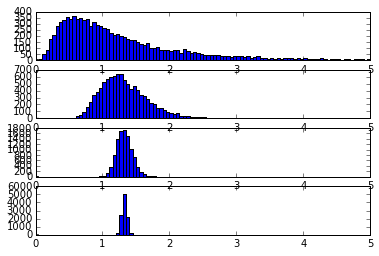

In [6]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(4)
for i, n in enumerate([1, 10, 100, 1000]):
    z = []
    for _ in range(10000):
        z.append(np.mean(lognorm.rvs(s=0.75, size=n)))
    print np.mean(z), np.std(z), lognorm.std(s=0.75)/n**0.5
    exec('ax' + str(i) + '.hist(z, bins=100, range=(0, 5))')

###In the above we see as the number of samples increases, the distribution of the new random variable becomes normal. This is despite the fact that the samples are drawn from a distribution which is not normal but skewed. Note that the mean of the original distribution is equal to the new mean while the standard deviation decreases as $\sigma/\sqrt{n}$. One can easily model such a new distribution using the normal distribution.

###Draw samples form a uniform distribution 

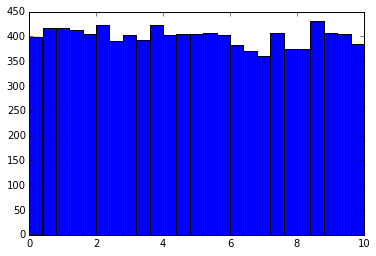

In [16]:
from scipy.stats import uniform
samples = uniform.rvs(loc=0.0, scale=10.0, size=10000)
n, bins, patches = plt.hist(samples, bins=25)

0.500072126047 0.291999185155 0.288675134595
0.501238176981 0.0914028597052 0.0912870929175
0.499902255844 0.0289155835784 0.0288675134595
0.499914375125 0.00910566930398 0.00912870929175


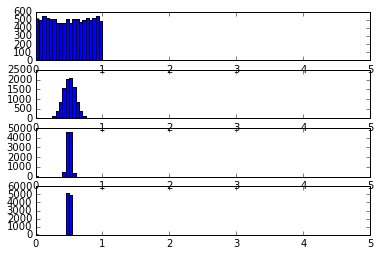

In [18]:
from scipy.stats import uniform
f, (ax0, ax1, ax2, ax3) = plt.subplots(4)
for i, n in enumerate([1, 10, 100, 1000]):
    z = []
    for _ in range(10000):
        z.append(np.mean(uniform.rvs(loc=0.0, scale=1.0, size=n))) # range is [loc, loc + scale)
    print np.mean(z), np.std(z), uniform.std(loc=0.0, scale=1.0)/n**0.5
    exec('ax' + str(i) + '.hist(z, bins=100, range=(0, 5))')